# Slow Boring Article Clustering (i.e., Grouping)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
import seaborn as sns
from IPython.display import display
from scipy.sparse import csr_matrix
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer

## Load Data
Read in data files for posts and word counts. Also perform some basic analysis of the raw data.

In [2]:
posts: pd.DataFrame = pd.read_csv('data/posts.csv')
posts['date'] = pd.to_datetime(posts['date'])
posts.head()

,post_id,date,title,audience,comments,likes,url
0,18135875,2020-11-13 15:55:55,Welcome to Slow Boring,free,243,148,https://www.slowboring.com/p/welcome-to-slow-b...
1,18177334,2020-11-18 11:00:53,Joe Biden's Cabinet isn't what matters,free,153,67,https://www.slowboring.com/p/joe-bidens-cabine...
2,18503568,2020-11-24 11:00:18,Low interest rates are a curse — we need massi...,free,107,54,https://www.slowboring.com/p/low-interest-rate...
3,18586396,2020-11-16 11:00:43,Make Blue America Great Again,free,332,176,https://www.slowboring.com/p/make-blue-america...
4,18642680,2020-11-17 11:09:52,"Minimum wage wins, affirmative action loses",free,229,139,https://www.slowboring.com/p/minimum-wage-wins...


In [3]:
X: csr_matrix = scipy.io.mmread('data/word_counts.mtx').tocsr()
X

<440x14818 sparse matrix of type '<class 'numpy.int64'>'
	with 319235 stored elements in Compressed Sparse Row format>

In [4]:
# fraction of matrix elements that are non-zero
X.nnz / np.prod(X.shape)

0.04896302408618511

In [5]:
words: pd.Series = pd.read_csv('data/words.csv')['word']
words.sample(10, random_state=0xCAFE)

12636           subsidiary
3105       cross pressured
2335               clarity
1112            assumption
8113               merrick
12040                slump
9518               perfect
7929     maryland virginia
6183             identical
6379            incredibly
Name: word, dtype: object

In [6]:
word_counts = pd.DataFrame.sparse.from_spmatrix(X, posts['post_id'], words)
word_counts

word,000,000 month,000 people,000 square,000 year,10,10 000,10 15,10 billion,10 million,...,zones,zoning,zoning codes,zoning laws,zoning reform,zoning rules,zoo,zoom,zoonotic,zuckerberg
post_id,,,,,,,,,,,,,,,,,,,,,
18135875,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18177334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18503568,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18586396,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
18642680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54679617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54876506,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55172787,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
word_counts_sample = word_counts.sample(20, random_state=0xCAFE)
word_counts_sampled_words = word_counts_sample.sum(axis=0).sort_values(ascending=False).head(30).index
word_counts_sample = word_counts_sample[word_counts_sampled_words]
word_counts_sample

word,right,political,policy,employment,high,jobs,labor,bad,idea,important,...,better,white,biden,long,politics,year,states,public,job,sense
post_id,,,,,,,,,,,,,,,,,,,,,
52906498,4,4,2,0,6,4,2,2,6,5,...,0,2,0,1,4,4,5,1,1,1
51206634,2,3,2,0,0,0,0,1,2,2,...,3,0,1,1,0,0,0,1,0,1
35242118,2,4,1,0,0,2,0,6,4,4,...,2,2,11,2,1,6,3,2,0,2
37075486,6,4,6,26,1,6,8,1,5,4,...,2,2,14,7,1,4,1,0,1,2
36203851,6,3,6,13,5,17,19,3,2,2,...,3,3,4,6,1,1,4,1,15,2
48296586,1,0,2,9,0,19,12,2,1,0,...,3,0,4,0,0,4,1,1,8,1
40304298,4,1,0,0,9,0,0,0,4,0,...,2,0,0,1,0,1,3,0,0,5
32517388,4,5,4,1,6,0,0,3,6,8,...,5,1,0,2,10,1,2,5,3,3
47201646,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


<AxesSubplot:xlabel='word', ylabel='post_id'>

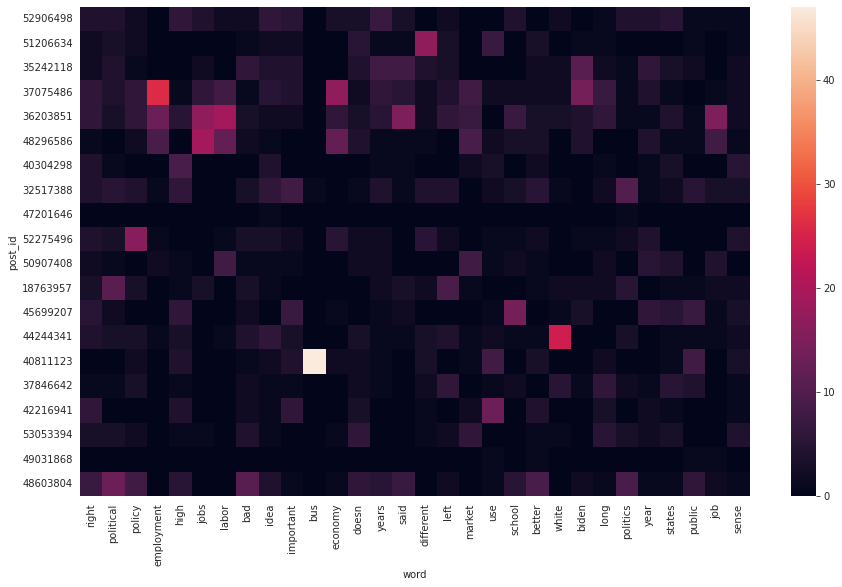

In [8]:
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
sns.heatmap(word_counts_sample, ax=ax)

In [9]:
word_sums = word_counts.sum(axis=0).rename('count').sort_values(ascending=False)
word_sums.head(10)

word
policy       1462
states       1286
biden        1274
democrats    1226
right        1209
political    1177
idea         1147
public       1144
state        1120
politics     1104
Name: count, dtype: int64

Text(0.5, 0, 'sum word count')

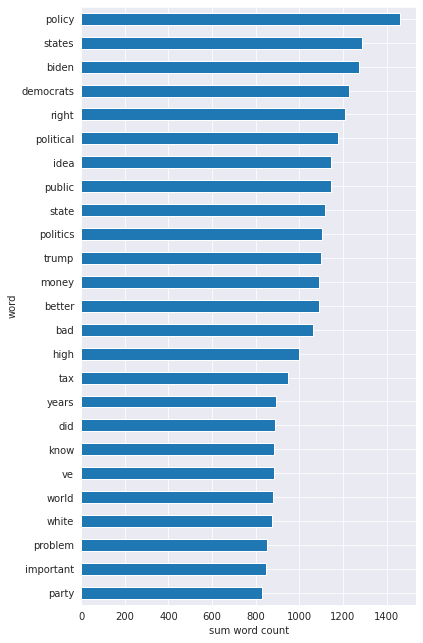

In [10]:
word_sums.head(25).iloc[::-1].plot.barh(figsize=(6, 11))
plt.xlabel('sum word count')

## tf–idf transformation

We use the [term frequency–inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) re-weighting to better represent how important a term is to an article.

From the aforelinked Wikipedia article

> The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. tf–idf is one of the most popular term-weighting schemes today.

In [11]:
tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X)
X_tfidf

<440x14818 sparse matrix of type '<class 'numpy.float64'>'
	with 319235 stored elements in Compressed Sparse Row format>

In [12]:
tfidf_df = pd.DataFrame.sparse.from_spmatrix(X_tfidf, posts['post_id'], words)
tfidf_df

word,000,000 month,000 people,000 square,000 year,10,10 000,10 15,10 billion,10 million,...,zones,zoning,zoning codes,zoning laws,zoning reform,zoning rules,zoo,zoom,zoonotic,zuckerberg
post_id,,,,,,,,,,,,,,,,,,,,,
18135875,0.0,0.0,0.0,0.0,0.0,0.020549,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
18177334,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
18503568,0.0,0.0,0.0,0.0,0.0,0.031400,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
18586396,0.0,0.0,0.0,0.0,0.0,0.010511,0.0,0.0,0.000000,0.0,...,0.0,0.017292,0.0,0.0,0.026378,0.0,0.0,0.0,0.0,0.0
18642680,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54679617,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
54876506,0.0,0.0,0.0,0.0,0.0,0.007368,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
55172787,0.0,0.0,0.0,0.0,0.0,0.014378,0.0,0.0,0.034709,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='word'>

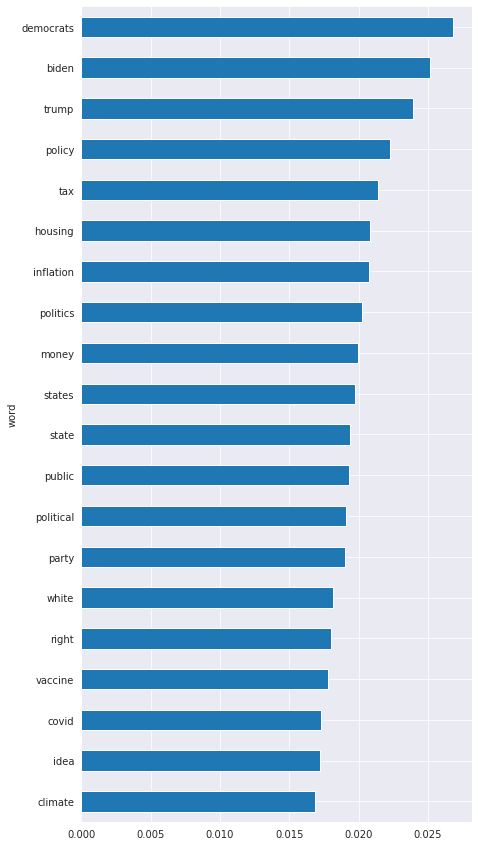

In [13]:
tfidf_df.mean(axis=0).sort_values().tail(20).plot.barh(figsize=(7, 15))

In [14]:
X_norm = Normalizer(copy=True).fit_transform(X_tfidf)
X_norm

<440x14818 sparse matrix of type '<class 'numpy.float64'>'
	with 319235 stored elements in Compressed Sparse Row format>

In [15]:
word_norm = pd.DataFrame.sparse.from_spmatrix(X_norm, posts['post_id'], words)
word_norm

word,000,000 month,000 people,000 square,000 year,10,10 000,10 15,10 billion,10 million,...,zones,zoning,zoning codes,zoning laws,zoning reform,zoning rules,zoo,zoom,zoonotic,zuckerberg
post_id,,,,,,,,,,,,,,,,,,,,,
18135875,0.0,0.0,0.0,0.0,0.0,0.020549,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
18177334,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
18503568,0.0,0.0,0.0,0.0,0.0,0.031400,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
18586396,0.0,0.0,0.0,0.0,0.0,0.010511,0.0,0.0,0.000000,0.0,...,0.0,0.017292,0.0,0.0,0.026378,0.0,0.0,0.0,0.0,0.0
18642680,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54679617,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
54876506,0.0,0.0,0.0,0.0,0.0,0.007368,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
55172787,0.0,0.0,0.0,0.0,0.0,0.014378,0.0,0.0,0.034709,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='word'>

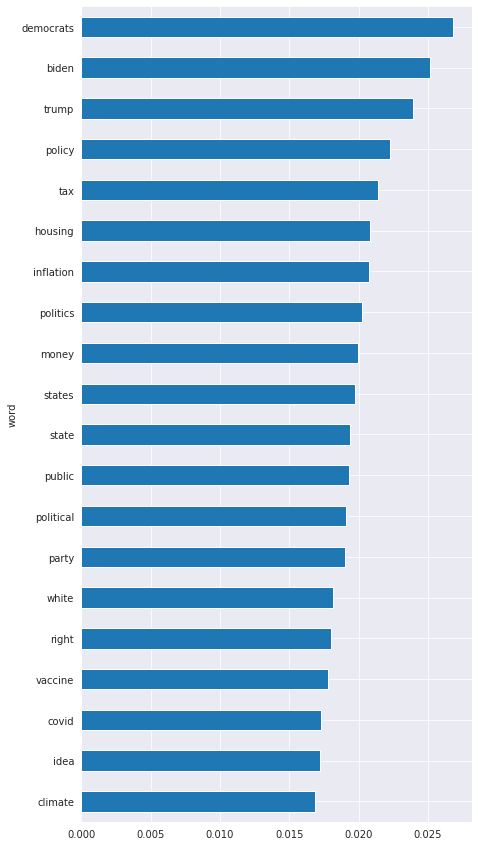

In [16]:
word_norm.mean(axis=0).sort_values().tail(20).plot.barh(figsize=(7, 15))

## Correlations and Dimensional Reduction

A common challenge in working with term frequency data is that some terms are highly correlated with each other.
E.g., the terms `manchin` and `bbb` are frequently seen together in some articles and similarly both absent in other articles.
This can make clustering difficult because multiple terms encode the same information.

The following analysis shows how we can quantity correlation between terms and examples of highly correlated terms.
The next section will explore how to handle this correlation challenge.

In [17]:
# Compute the pairwise correlation between every pair of terms. A correlation of 1 implies perfectly correlated, -1 implies perfectly inversely correlated, whereas a value of 0
# corresponds to no correlation at all.
def sparse_corr_coef(A):
    # from https://stackoverflow.com/questions/19231268/correlation-coefficients-for-sparse-matrix-in-python

    A = A.astype(np.float32)
    n = A.shape[1]

    # Compute the covariance matrix
    rowsum = A.sum(1)
    centering = rowsum.dot(rowsum.T.conjugate()) / n
    C = (A.dot(A.T.conjugate()).todense() - centering) / (n - 1)

    # The correlation coefficients are given by
    # C_{i,j} / sqrt(C_{i} * C_{j})
    d = np.diag(C)
    coeffs = C / np.sqrt(np.outer(d, d))

    return coeffs

corr = sparse_corr_coef(X_norm.T.tocsr())
corr = pd.DataFrame(np.array(corr), words, words)
corr

word,000,000 month,000 people,000 square,000 year,10,10 000,10 15,10 billion,10 million,...,zones,zoning,zoning codes,zoning laws,zoning reform,zoning rules,zoo,zoom,zoonotic,zuckerberg
word,,,,,,,,,,,,,,,,,,,,,
000,1.000000,0.169195,0.221712,0.121572,0.451895,0.133259,0.216452,0.182717,-0.013596,0.000381,...,-0.055335,-0.021934,0.083211,-0.026367,-0.036377,0.004980,-0.052129,0.041738,-0.042979,-0.027974
000 month,0.169195,1.000000,-0.021970,-0.011722,0.052642,-0.058512,-0.022294,-0.014455,-0.018610,-0.017785,...,-0.013370,-0.001523,-0.012847,-0.014275,-0.013764,-0.012526,-0.012595,-0.023834,-0.010692,-0.017855
000 people,0.221712,-0.021970,1.000000,0.050288,-0.038908,0.046799,0.045276,-0.021430,0.081210,-0.026367,...,-0.019820,0.003495,0.063964,0.051856,-0.020405,-0.018570,-0.018672,0.093088,-0.015850,-0.026470
000 square,0.121572,-0.011722,0.050288,1.000000,0.000986,0.003925,-0.017633,-0.011433,-0.014720,-0.014067,...,-0.010575,0.049712,0.255689,0.118620,0.001928,0.030486,-0.009962,0.019683,-0.008457,-0.014123
000 year,0.451895,0.052642,-0.038908,0.000986,1.000000,0.076759,0.207708,-0.025599,-0.020080,-0.019347,...,-0.023676,-0.032881,-0.022751,-0.025280,-0.024374,-0.022183,-0.022305,-0.032624,-0.018934,0.006009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoning rules,0.004980,-0.012526,-0.018570,0.030486,-0.022183,0.094266,-0.018844,-0.012218,-0.015730,-0.015033,...,-0.011301,0.119068,0.088247,-0.012066,-0.000886,1.000000,-0.010646,0.036834,-0.009037,0.076004
zoo,-0.052129,-0.012595,-0.018672,-0.009962,-0.022305,0.025485,-0.018947,-0.012285,-0.015816,-0.015115,...,0.458687,-0.002333,-0.010918,-0.012132,-0.011697,-0.010646,1.000000,0.111678,-0.009087,-0.015175
zoom,0.041738,-0.023834,0.093088,0.019683,-0.032624,-0.032968,-0.035854,-0.023248,0.060330,-0.028603,...,0.057584,0.105193,0.026612,0.124175,0.107991,0.036834,0.111678,1.000000,-0.017195,-0.028715


In [18]:
# Distribution of pairwise correlations
(pd.Series(corr.values.ravel())
 .describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999])
 .drop(['count'])
 .mul(100)
 .round(1))

mean       0.2
std        5.1
min      -20.2
1%        -5.4
5%        -3.7
10%       -3.0
25%       -2.1
50%       -1.4
75%        0.0
90%        5.9
95%       10.2
99%       21.0
99.9%     39.6
max      100.0
dtype: float64

<Figure size 1080x504 with 0 Axes>

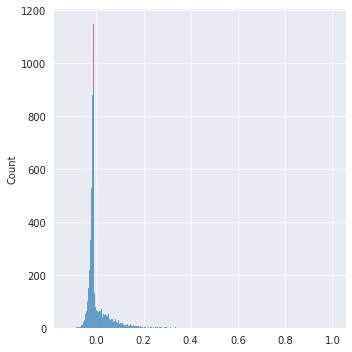

In [19]:
plt.figure(figsize=(15, 7))
sns.displot(pd.Series(corr.values.ravel()).sample(10_000, random_state=0xCAFE))

In [20]:
i,j = np.where((corr.values > 0.8) & (corr.values < 0.81))
w = i > j
high_corrs = pd.concat([pd.Series(i[w], name='i'), pd.Series(j[w], name='j')], axis=1)
for axis in 'i', 'j':
    high_corrs['w_' + axis] = pd.Series(word_counts.columns).iloc[high_corrs[axis]].reset_index(drop=True)
    high_corrs['n_' + axis] = word_sums.loc[high_corrs['w_' + axis]].reset_index(drop=True)
high_corrs['corr'] = high_corrs.apply(lambda row: corr.iloc[row['i'],row['j']], axis=1)
high_corrs = high_corrs.set_index(['w_i', 'w_j'])
high_corrs = high_corrs.drop(['i', 'j'], axis=1)
high_corrs = high_corrs.sort_values('corr', ascending=False)
high_corrs.head(20)

,,n_i,n_j,corr
w_i,w_j,,,
water pipes,pipes,13,38,0.809994
violent crimes,clearance,15,19,0.809978
immigration,immigrants,309,101,0.809911
meal,mac,9,27,0.809737
student loans,loan,12,102,0.809727
nuclear,advanced nuclear,182,12,0.809722
strauss,natalie,5,8,0.809668
price oil,barrel,10,10,0.809526
trial,clinical trial,76,20,0.809245


## Dimensional Reduction

The above analysis shows that most pairs of terms have a weak inverse correlation. I.e., the presence of one term makes the other term marginally less likely.
Yet there are some pairs of terms that are significantly correlated, either positively or negatively.
To address the issue with clustering on correlated variables, we can project the term frequency data into a lower-dimension space where the new variables have less correlation between each other.

For this we use the [singular value decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) to apply the common text analysis method of [latent semantic analysis](https://en.wikipedia.org/wiki/Latent_semantic_analysis).

In [21]:
# Perform dimensional reduction for a range of different component counts and quantify how well each represents the original data.
n_var = []
for n in [5, 10, 25, 50, 100, 250, 1000]:
    print(n)
    svd = TruncatedSVD(n)
    svd.fit(X_norm)
    n_var.append([n, svd.explained_variance_ratio_.sum()])
n_var = pd.DataFrame(n_var, columns=['n', 'var'])
n_var

5
10
25
50
100
250
1000


,n,var
0,5,0.067215
1,10,0.118969
2,25,0.210260
3,50,0.311762
4,100,0.458200
5,250,0.767125
6,1000,1.000000


In [22]:
svd = TruncatedSVD(20)
X_lsa = svd.fit_transform(X_norm)
X_lsa

array([[ 4.00098742e-01,  2.94589968e-01,  2.18912645e-02, ...,
        -9.38838546e-02,  3.83430147e-02, -1.31217136e-01],
       [ 2.95584231e-01,  9.50436836e-02, -2.07970472e-02, ...,
        -8.56005034e-03, -1.16937602e-01, -1.25914224e-01],
       [ 3.77206081e-01, -5.42562346e-02, -1.71785463e-01, ...,
        -2.77583875e-02,  3.50041908e-02,  5.82438705e-03],
       ...,
       [ 3.48379091e-01, -1.41523570e-01,  2.71033447e-01, ...,
        -1.00113002e-01, -4.72775714e-02,  3.62637728e-02],
       [ 3.18425735e-01,  1.52420500e-01,  7.05417002e-05, ...,
         1.26908450e-01,  1.22550046e-01,  2.89685331e-01],
       [ 3.92720530e-01,  7.66602224e-03, -9.43071217e-03, ...,
         4.14567961e-02,  2.73003504e-02,  4.32255088e-02]])

In [23]:
svd.explained_variance_ratio_.sum()

0.18423419002138397

In [24]:
svd_components = pd.DataFrame(svd.components_, columns=words)
svd_components

word,000,000 month,000 people,000 square,000 year,10,10 000,10 15,10 billion,10 million,...,zones,zoning,zoning codes,zoning laws,zoning reform,zoning rules,zoo,zoom,zoonotic,zuckerberg
0,0.031299,0.001872,0.003092,0.000984,0.006713,0.022192,0.003835,0.001488,0.002367,0.002590,...,0.001441,0.018156,0.001135,0.001620,0.005364,0.001725,0.001824,0.006000,0.001762,0.002383
1,-0.019863,-0.002383,-0.002368,-0.002200,0.002790,-0.013258,-0.001399,-0.003692,-0.002632,-0.002192,...,-0.001683,-0.013373,-0.001067,-0.000175,-0.001549,-0.001986,-0.000937,-0.011422,-0.002354,-0.002163
2,-0.012780,-0.001389,0.004735,-0.001144,-0.008128,0.001209,-0.001999,-0.001175,0.003310,0.005845,...,0.001102,-0.008597,-0.000498,-0.000753,-0.003235,-0.001161,0.001855,0.009349,0.006246,-0.002581
3,-0.014855,0.000091,0.001048,0.005341,-0.007704,-0.003370,-0.001786,-0.003046,-0.002841,-0.004653,...,0.007017,0.062551,0.005191,0.004507,0.018819,0.003240,0.005058,0.002929,-0.000642,0.000964
4,-0.037502,-0.003804,0.000159,-0.002874,-0.013618,-0.000547,-0.002163,0.003163,-0.001433,-0.000435,...,-0.003110,-0.035574,-0.003781,-0.001991,-0.011003,-0.000748,-0.002196,-0.003307,0.003813,-0.002728
5,-0.022716,-0.001460,-0.002286,-0.001434,-0.008656,-0.002364,-0.001611,0.003350,-0.005369,-0.001590,...,-0.000483,0.016781,0.001641,0.000286,0.005394,-0.000033,0.001235,0.000309,-0.001613,0.001367
6,0.007298,0.000291,-0.003296,-0.004919,0.005882,0.001343,0.003393,-0.000367,-0.001972,0.000473,...,-0.005619,-0.036952,-0.002779,-0.002641,-0.013085,-0.001318,-0.005841,-0.005868,0.000250,0.002927
7,-0.017318,-0.001628,-0.000966,-0.003422,-0.004861,0.002995,-0.001352,-0.000134,-0.000800,0.000592,...,-0.003513,-0.022018,-0.001341,-0.001294,-0.009315,0.001122,-0.003649,-0.006910,0.001978,-0.000056
8,0.006367,0.001410,0.001713,-0.000271,0.000981,0.006173,-0.001552,-0.000146,0.002054,-0.001233,...,0.004318,-0.022451,-0.000236,-0.002052,-0.009442,0.001115,0.005924,-0.005046,-0.000961,-0.002845
9,-0.001818,0.002703,-0.001891,-0.001623,-0.000068,0.004824,0.005508,-0.001481,-0.001044,-0.002567,...,0.010655,-0.068501,-0.007232,-0.004301,-0.022912,-0.004311,0.006319,0.004249,0.001257,0.001386


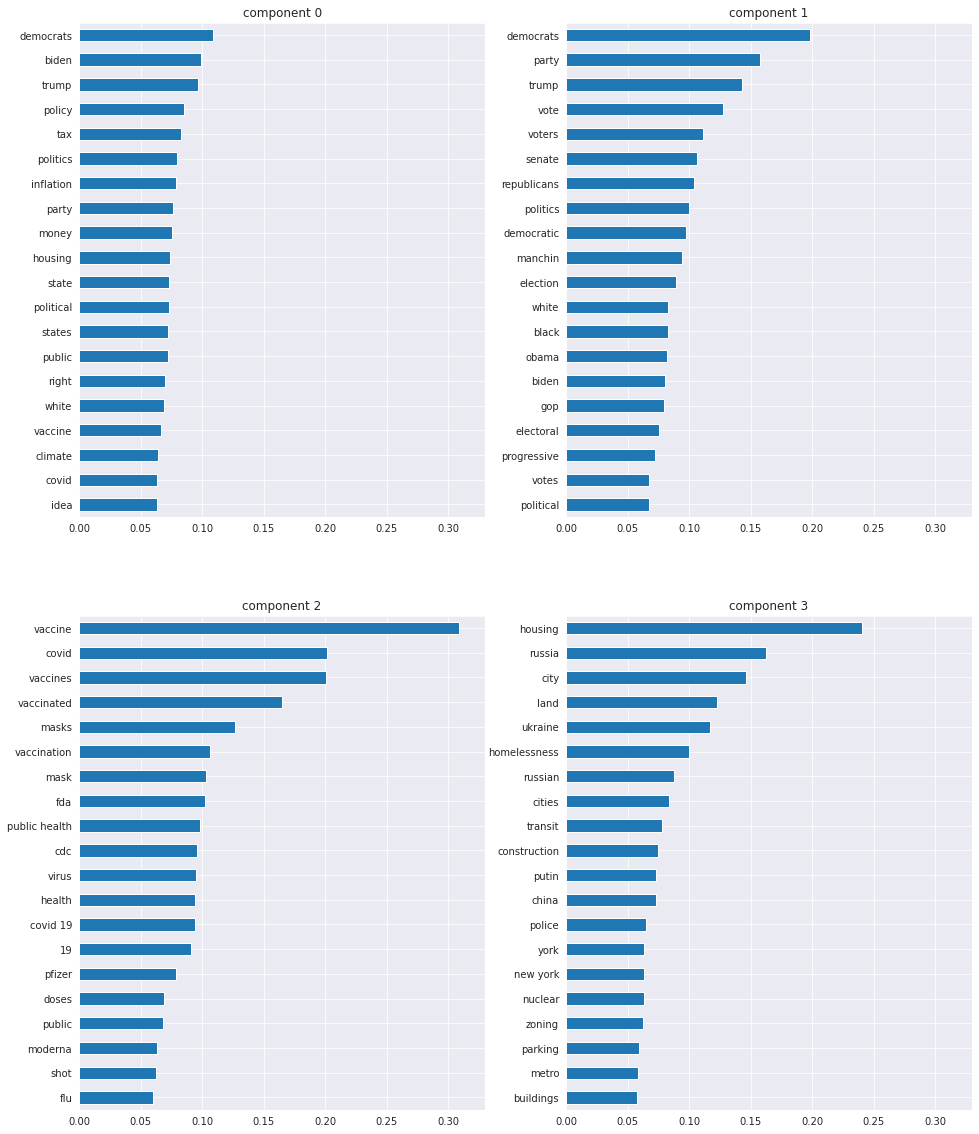

In [25]:
# Plot the terms that correspond to each component for several the reduced dimension components
fig = plt.figure(figsize=(16, 20))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    ax.set_title(f'component {i}')
    (svd_components.iloc[i]
     .sort_values()
     .tail(20)
     .plot.barh(ax=ax)
    )
    ax.set_xlim(0, 0.33)
    ax.set_ylabel(None)

## Clustering

We use the [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering) method to identify clusters of articles that have similar term frequencies within
the reduced dimensional space.
Each cluster has center (i.e., centroid) within this reduced dimensional space and articles are assigned to cluster that is closest.

In [26]:
km = MiniBatchKMeans(
    n_clusters=10,
    init="k-means++",
    n_init=1,
    init_size=1000,
    batch_size=1000,
    verbose=10,
)
km.fit(X_lsa)
None

Init 1/1 with method k-means++
Inertia for init 1/1: 54.896488656530735
Minibatch step 1/100: mean batch inertia: 0.13722009649214678
Minibatch step 2/100: mean batch inertia: 0.10982524913558196, ewa inertia: 0.10982524913558196
Minibatch step 3/100: mean batch inertia: 0.10786231060197916, ewa inertia: 0.10786231060197916
Minibatch step 4/100: mean batch inertia: 0.09625339333958613, ewa inertia: 0.09625339333958613
Minibatch step 5/100: mean batch inertia: 0.09811824958805036, ewa inertia: 0.09811824958805036
Minibatch step 6/100: mean batch inertia: 0.10156085093808945, ewa inertia: 0.10156085093808945
Minibatch step 7/100: mean batch inertia: 0.10156693962688988, ewa inertia: 0.10156693962688988
Minibatch step 8/100: mean batch inertia: 0.0924988970838949, ewa inertia: 0.0924988970838949
Minibatch step 9/100: mean batch inertia: 0.0935580109884521, ewa inertia: 0.0935580109884521
Minibatch step 10/100: mean batch inertia: 0.09342066373811897, ewa inertia: 0.09342066373811897
Minib

In [27]:
original_space_centroids = pd.DataFrame(svd.inverse_transform(km.cluster_centers_), columns=words)
original_space_centroids

word,000,000 month,000 people,000 square,000 year,10,10 000,10 15,10 billion,10 million,...,zones,zoning,zoning codes,zoning laws,zoning reform,zoning rules,zoo,zoom,zoonotic,zuckerberg
0,0.003493,-0.000322,0.000020,0.000105,0.001356,0.004336,0.000009,0.000109,0.000449,0.001312,...,0.000122,0.020281,0.001851,0.001343,0.006499,0.000658,-0.000304,-0.000735,0.001172,0.001673
1,0.004503,-0.000085,0.000365,-0.000103,0.002138,0.004093,0.000774,0.000084,0.000048,0.000205,...,-0.000052,0.002403,-0.000018,0.000439,0.001540,-0.000042,0.000534,-0.000016,-0.000497,-0.000077
2,0.005429,0.000672,0.001175,-0.000133,0.000674,0.005830,0.000416,0.000107,0.000272,0.000376,...,0.000546,0.001985,0.000417,0.000224,-0.000099,0.000986,0.001081,0.000034,0.000287,-0.000331
3,0.003643,0.000131,0.000668,0.000072,-0.000034,0.005152,0.000747,0.000152,0.000093,0.000081,...,0.000217,-0.000592,-0.000145,0.000357,-0.000598,0.000107,0.000112,0.001626,-0.000917,0.000166
4,0.010099,0.000284,0.002645,-0.000012,0.000313,0.008267,0.000645,0.001063,0.002654,0.003340,...,0.000227,-0.000631,-0.000081,-0.000070,-0.000574,-0.000033,0.000555,0.005161,0.002092,-0.000114
5,0.008314,0.000824,0.000185,-0.000216,0.000396,0.008700,0.001198,0.002234,-0.000349,0.000344,...,-0.000278,0.002569,-0.000073,0.000059,0.000628,0.000732,0.000282,0.002777,0.000305,0.000906
6,0.025801,0.001706,0.000512,0.000534,0.009278,0.008253,0.002159,0.000291,0.002089,0.000795,...,-0.000265,0.000146,0.000130,0.000195,-0.000657,0.000558,-0.000434,0.000419,-0.000190,0.001836
7,0.006651,0.000513,0.000840,0.000406,0.001014,0.005834,0.001193,0.000166,0.000714,0.000476,...,0.001106,0.003193,0.000032,0.000370,0.000717,0.000533,0.000728,0.001714,0.001181,0.001138
8,0.012976,0.001192,0.002052,0.003286,0.000730,0.005029,0.000270,0.000006,0.000366,-0.000298,...,0.001523,0.042366,0.003612,0.002802,0.013591,0.002384,0.002110,0.005130,-0.000200,0.000278
9,0.012652,0.000878,-0.000161,-0.000284,0.002548,0.007364,0.003337,-0.000127,-0.000317,0.000572,...,-0.000100,0.001712,0.000042,0.000002,0.000428,-0.000452,-0.000277,0.002807,-0.000619,0.000860


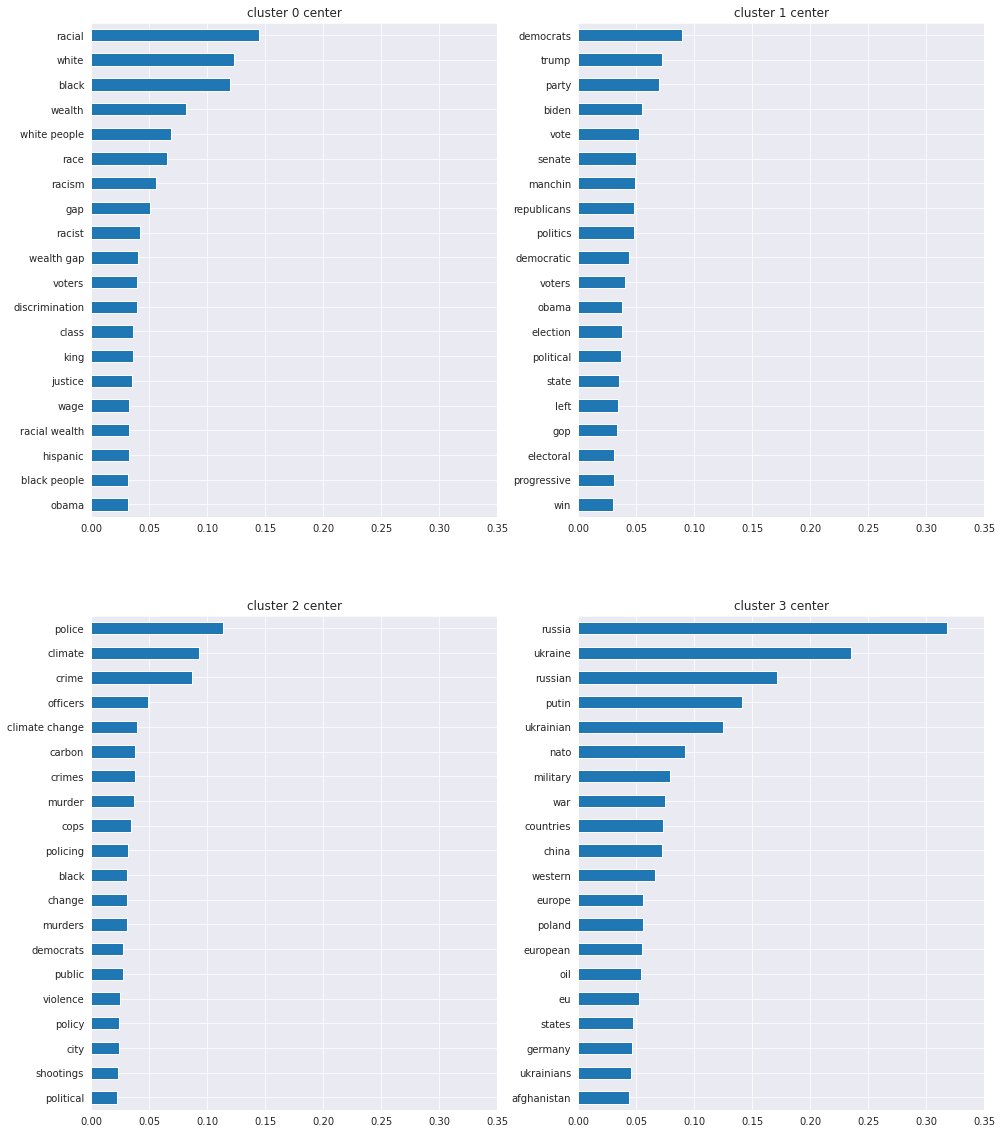

In [28]:
# Plot the significant terms for each of the first four clusters
fig = plt.figure(figsize=(16, 20))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    ax.set_title(f'cluster {i} center')
    (original_space_centroids.iloc[i]
     .sort_values()
     .tail(20)
     .plot.barh(ax=ax)
    )
    ax.set_xlim(0, 0.35)
    ax.set_ylabel(None)

In [29]:
# Determine which cluster each article has been assigned to
cluster_labels = pd.Series(km.labels_, index=posts['post_id'], name='cluster')
cluster_labels.sample(10, random_state=0xCAFE)

post_id
52906498    7
51206634    7
35242118    7
37075486    5
36203851    5
48296586    5
40304298    7
32517388    7
47201646    7
52275496    6
Name: cluster, dtype: int32

In [30]:
cluster_counts = cluster_labels.value_counts().rename('count')
cluster_counts

7    151
1     70
4     41
5     36
6     31
2     28
8     27
0     25
9     21
3     10
Name: count, dtype: int64

In [31]:
clustered_posts = pd.merge(
    cluster_labels.to_frame(),
    posts.set_index('post_id'),
    left_index=True,
    right_index=True
)
clustered_posts.sample(10, random_state=0xCAFE)

,cluster,date,title,audience,comments,likes,url
post_id,,,,,,,
52906498,7,2022-04-29 10:00:39,April mailbag brings May takes,paid,233,98,https://www.slowboring.com/p/april-mailbag-bri...
51206634,7,2022-04-04 10:00:43,The bizarre myth that Ancient Greeks couldn't ...,paid,302,172,https://www.slowboring.com/p/greeks-blue
35242118,7,2021-04-19 10:00:59,Leaving the ESPN Zone of Empires,paid,308,154,https://www.slowboring.com/p/leaving-the-espn-...
37075486,5,2021-06-03 10:00:02,The experts underrate full employment,free,187,150,https://www.slowboring.com/p/underrating-full-...
36203851,5,2021-05-12 10:00:09,Don't underreact to one bad jobs report,paid,161,94,https://www.slowboring.com/p/job-report
48296586,5,2022-02-08 11:00:39,The real story behind last week's jobs report,free,111,56,https://www.slowboring.com/p/the-real-story-be...
40304298,7,2021-08-24 10:00:53,Amtrak's plans for a cash infusion aren't good...,free,191,120,https://www.slowboring.com/p/amtraks-plans-for...
32517388,7,2021-02-14 04:17:17,In defense of interesting writing on controver...,free,474,288,https://www.slowboring.com/p/slate-star-codex
47201646,7,2022-01-17 22:00:53,Ask me stuff,paid,1033,593,https://www.slowboring.com/p/ask-me-stuff


In [32]:
# Inspect a sample of articles for each cluster
for cluster, n in cluster_counts.items():
    print(f'{cluster=} {n=}')
    key_terms = (
        original_space_centroids
        .iloc[cluster]
        .sort_values(ascending=False)
        .head(10)
        .mul(1000)
        .round()
        .astype(int)
    )
    display(key_terms.to_frame().T)

    cluster_sample = (
        clustered_posts
        [clustered_posts['cluster'] == cluster]
        .sample(min(5, n), random_state=0xCAFE)
        .sort_values('date')
        .assign(date=lambda x: x['date'].dt.date)
        .drop(['cluster', 'url'], axis=1)
    )
    display(cluster_sample)

cluster=7 n=151


word,china,amazon,money,states,amtrak,policy,world,transit,idea,right
7,28,24,21,19,19,18,18,18,18,18


,date,title,audience,comments,likes
post_id,,,,,
18763957,2020-11-19,What's wrong with the media,free,309,158
33621408,2021-03-16,Meritocracy is bad,free,436,259
39691221,2021-08-10,Saving openness to immigration,free,327,132
40013889,2021-08-14,Saturday Thread,paid,94,4
49957000,2022-03-11,New York State of mailbag,free,158,89


cluster=1 n=70


word,democrats,trump,party,biden,vote,senate,manchin,republicans,politics,democratic
1,90,72,70,55,53,50,49,49,48,43


,date,title,audience,comments,likes
post_id,,,,,
31175374,2021-01-11,The system doesn't work,paid,298,219
38021094,2021-06-25,Thirteen ways of looking at a bipartisan infra...,free,98,65
41538326,2021-09-22,The median voter is a 50-something white perso...,free,462,179
42818394,2021-10-25,The progressive mobilization myth is alive and...,paid,317,189
51850560,2022-04-11,Democrats are sleepwalking into a Senate disaster,free,381,113


cluster=4 n=41


word,vaccine,covid,vaccines,vaccinated,masks,vaccination,health,fda,covid 19,19
4,157,102,101,83,57,54,54,52,51,49


,date,title,audience,comments,likes
post_id,,,,,
26785599,2020-12-21,ACIP and the experts,paid,199,165
32803727,2021-02-26,Back to normal means ignoring the CDC,paid,255,183
33205193,2021-03-05,Covid: Year One,paid,247,153
44963138,2021-12-07,The CDC's vaccine data is all wrong,free,139,117
47387100,2022-02-05,What anti-Covid policies actually work?,free,301,88


cluster=5 n=36


word,inflation,fed,economy,prices,labor,demand,supply,price,unemployment,jobs
5,194,95,79,74,69,51,50,48,45,43


,date,title,audience,comments,likes
post_id,,,,,
19335206,2020-11-23,Janet Yellen's mistake,free,124,76
30087879,2021-01-04,The truth about immigration and wages,paid,223,123
35331456,2021-04-21,What to make of the labor shortage talk,paid,137,90
37443861,2021-06-14,Why we got more inflation than I expected,free,110,142
48296586,2022-02-08,The real story behind last week's jobs report,free,111,56


cluster=6 n=31


word,tax,child,ctc,child care,income,money,program,care,taxes,biden
6,144,108,90,65,64,59,59,58,55,51


,date,title,audience,comments,likes
post_id,,,,,
18503568,2020-11-24,Low interest rates are a curse — we need massi...,free,107,54
31499698,2021-01-14,Meet the American Rescue Act,free,147,88
32380811,2021-02-11,A better criticism of Biden's COVID-19 relief ...,free,55,46
33561876,2021-03-15,How to pay for infrastructure,paid,235,98
35736024,2021-04-30,The case against coupon government,free,221,84


cluster=2 n=28


word,police,climate,crime,officers,climate change,carbon,crimes,murder,cops,policing
2,114,93,87,49,39,38,38,37,35,32


,date,title,audience,comments,likes
post_id,,,,,
20181001,2020-12-01,Climate change is really hard,paid,282,132
32339536,2021-02-15,The myth of the Overton Window,free,382,221
38260421,2021-07-06,Popularism for moderates: The case of the carb...,free,131,103
42095638,2021-10-05,Is quiet climate policy enough?,free,321,211
44794053,2021-12-03,Public opinion was very conservative in the 1990s,free,310,94


cluster=8 n=27


word,housing,homelessness,city,land,construction,houses,units,cities,homes,zoning
8,206,85,80,75,51,47,44,43,42,42


,date,title,audience,comments,likes
post_id,,,,,
18586396,2020-11-16,Make Blue America Great Again,free,332,176
31867708,2021-01-27,The “induced demand“ case against YIMBYism is ...,free,265,166
37783952,2021-06-23,The case for tall buildings,paid,146,143
40013897,2021-08-18,Why more Porsches means cheaper Priuses,paid,310,153
43078271,2021-10-27,The politics of abundance,free,265,134


cluster=0 n=25


word,racial,white,black,wealth,white people,race,racism,gap,racist,wealth gap
0,145,123,120,82,69,66,56,51,42,41


,date,title,audience,comments,likes
post_id,,,,,
18642680,2020-11-17,"Minimum wage wins, affirmative action loses",free,229,139
19229056,2020-12-02,"The ""racial wealth gap"" is a class gap",free,199,99
34346394,2021-03-27,"Weekend Update, March 27",paid,248,125
38366395,2021-07-08,Martin Luther King called for radical redistri...,free,319,139
41661400,2021-09-24,Urban/rural polarization is about racial attit...,free,420,185


cluster=9 n=21


word,school,schools,students,teachers,education,kids,college,student,debt,scores
9,128,124,100,86,78,78,71,69,58,48


,date,title,audience,comments,likes
post_id,,,,,
21496045,2020-12-04,The case for canceling a lot of student debt,free,319,63
29866749,2020-12-31,Culturally relevant pedagogy is good,free,344,201
40369585,2021-08-26,D.C.'s teacher compensation reform is working,free,184,110
40605148,2021-09-01,More good news about D.C.'s teacher pay reforms,free,72,51
45221732,2021-12-13,California’s math detracking initiative seems ...,paid,364,183


cluster=3 n=10


word,russia,ukraine,russian,putin,ukrainian,nato,military,war,countries,china
3,318,235,172,141,125,92,80,75,73,73


,date,title,audience,comments,likes
post_id,,,,,
47140290,2022-01-15,The case for rapprochement with Russia,free,161,71
48313805,2022-02-09,Invading Ukraine is a really bad idea,free,260,174
49371173,2022-03-01,23 thoughts on the war in Ukraine,free,394,191
50154475,2022-03-15,What went wrong with Russia in the 1990s,paid,110,145
51122253,2022-03-30,Ukraine and the end of history,free,155,132
